# Notebook 1 - Fondamentaux Python pour l'IA
# Analyse de données météorologiques en temps réel

🎯 Objectifs pédagogiques

Maîtriser les structures de données Python essentielles
Consommer des APIs REST avec requests
Manipuler des données JSON et CSV
Créer des visualisations basiques
Appliquer des statistiques descriptives

🌤️ Contexte du projet

Vous travaillez pour une startup AgTech qui développe des solutions d'agriculture intelligente. Votre mission : analyser les données météorologiques de plusieurs villes européennes pour optimiser les recommandations de plantation.

Partie 1 : Connexion aux APIs météo

🔧 Installation des bibliothèques


 À exécuter dans votre terminal ou cellule
# pip install requests pandas matplotlib seaborn numpy

In [107]:
#📥 Import et configuration
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import json
print("Bibliothèques importées avec succès")

Bibliothèques importées avec succès


In [108]:
# Vérification de la version de requests
import requests
print(requests.__version__)

2.32.4


In [109]:
#verification 
import json
print("json importé avec succès")

json importé avec succès


In [110]:
#verification de la connexion à l'API
response = requests.get('https://api.github.com')
print(response.status_code)

200


🌍 API OpenWeatherMap (gratuite)

Inscription : Créez un compte sur openweathermap.org


Clé API : Récupérez votre clé gratuite (40 000 appels/mois)



In [111]:
### 💡 Première requête guidée


def get_weather_data(city, api_key):
    """
    Récupère les données météo actuelles pour une ville

    Étapes à compléter :
    1. Construire l'URL avec les paramètres
    2. Faire l'appel API avec requests.get()
    3. Vérifier le status code
    4. Retourner les données JSON
    """
    # URL : current weather data
    url = f"{BASE_URL}/weather"

    # Paramètres à compléter
    params = {
        'q': city,
        'appid': api_key,
        'units': 'metric',  # Celsius
        'lang': 'fr'
    }
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Vérifie le code HTTP (200 OK)
        return response.json()
    except requests.exceptions.HTTPError as http_err:
        print(f"Erreur HTTP pour {city}: {http_err} - {response.text}")
    except requests.exceptions.RequestException as err:
        print(f"Erreur requête pour {city}: {err}")

    return None



In [112]:
import os
from dotenv import load_dotenv

# Charger les variables d'environnement du fichier .env
load_dotenv()

# Récupérer la clé
API_KEY = os.getenv("API_KEY_notebook1")
VC_API_KEY = os.getenv("VC_API_KEY")

In [113]:
# Configuration API
  # Remplacez par votre vraie clé
BASE_URL = "https://api.openweathermap.org/data/2.5"

# Villes à analyser (agriculture européenne)
CITIES = ["Paris", "Berlin", "Madrid", "Rome", "Amsterdam", "Vienna"]

#teste exp d'utilisation pour afficher la météo de chaque ville
for city in CITIES:
    data = get_weather_data(city, API_KEY)
    if data:
        print(f"Météo à {city} : {data['weather'][0]['description']}, Température : {data['main']['temp']}°C")
    else:
        print(f"Impossible de récupérer la météo pour {city}")

Météo à Paris : couvert, Température : 23.15°C
Météo à Berlin : peu nuageux, Température : 21.8°C
Météo à Madrid : ciel dégagé, Température : 27.42°C
Météo à Rome : ciel dégagé, Température : 25.61°C
Météo à Amsterdam : peu nuageux, Température : 22.21°C
Météo à Vienna : couvert, Température : 20.79°C


**Questions de débogage :**
- Que faire si l'API retourne une erreur 401 ?

-**La CAUSE :** L’erreur 401 signifie que l’accès est refusé, cad :

-Mauvais nom de variable/ou  Mauvaise clé copiée/ n’est pas encore activée/ OU elle bien chargée par os.getenv("API_KEY")

**La solution :**

**1-assurer que l’URL commence bien par https://**

**2-Afficher temporairement la clé pour déboguer**

- Comment gérer une ville introuvable ?

- le cause possible Ville mal orthographiée / inconnue , la solution ajouter une gestion spécifique dans mon code 


---

## Partie 2 : API complémentaire - Données historiques

### 📊 API Visual Crossing Weather (gratuite)
Alternative avec 1000 appels/jour gratuits : [visualcrossing.com](https://www.visualcrossing.com/weather-api)

In [114]:
# Configuration Visual Crossing + Base URL pour Visual Crossing

VC_BASE_URL = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline"

def get_historical_weather(city, start_date, end_date, api_key):
    """
    Récupère les données météo historiques

    Défis à résoudre :
    1. Construire l'URL avec les dates
    2. Gérer la pagination si nécessaire
    3. Extraire les données pertinentes du JSON complexe
    4. Convertir en DataFrame pandas
    """

    url = f"{VC_BASE_URL}/{city}/{start_date}/{end_date}"

    params = {
        'key': api_key,
        'include': 'days',
        'elements': 'datetime,temp,humidity,precip,windspeed,pressure',
        'unitGroup': 'metric',     # Pour avoir les températures en °C
        'contentType': 'json'
    }
    # Gérer les erreurs HTTP et autres exceptions
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Provoque une exception pour les erreurs HTTP (401, 404..)

        data = response.json()

        if "days" not in data:
            print("Aucune donnée journalière trouvée.")
            return pd.DataFrame()

        # Extraire la liste des jours
        days_data = data["days"]

        # Convertir en DataFrame
        df = pd.DataFrame(days_data)

        # Garde seulement les colonnes utiles
        df = df[['datetime', 'temp', 'humidity', 'precip', 'windspeed', 'pressure']]

        return df

    except requests.exceptions.HTTPError as http_err:
        print(f"Erreur HTTP : {http_err} - Code : {response.status_code}")
    except requests.exceptions.RequestException as err:
        print(f"Erreur lors de la requête : {err}")
    except Exception as e:
        print(f"Une erreur est survenue : {e}")

    return pd.DataFrame()  # Retourne un DataFrame vide en cas d'erreur


# Exemple 
df = get_historical_weather("Montpellier", "2024-06-01", "2024-06-15", VC_API_KEY)
print(df.head())


     datetime  temp  humidity  precip  windspeed  pressure
0  2024-06-01  19.5      51.8   0.717       22.0    1014.9
1  2024-06-02  19.4      64.1   0.728       16.7    1016.9
2  2024-06-03  21.2      60.2   0.000       19.3    1015.7
3  2024-06-04  19.5      70.4   0.000       26.5    1014.8
4  2024-06-05  20.1      87.5   0.179       17.6    1016.2


### 🎯 Mission pratique
Récupérez les données des 30 derniers jours pour toutes vos villes et créez un DataFrame consolidé.

**Structure attendue :**
```
| date       | ville     | temperature | humidite | precipitation | vent |
|------------|-----------|-------------|----------|---------------|------|
| 2024-01-01 | Paris     | 12.5        | 75       | 2.3          | 15   |
```

---


In [115]:
## Partie 3 : API supplémentaire - Qualité de l'air
BASE_URL = "http://api.openweathermap.org/data/2.5/air_pollution"
### API OpenWeatherMap Air Pollution
def get_air_quality(lat, lon, api_key):
    """
    Récupère les données de qualité de l'air
    on va cree un dictionnaire avec les donnees de la pollution:
    -
    URL : http://api.openweathermap.org/data/2.5/air_pollution

    Étapes :
    1. Utiliser les coordonnées lat/lon des villes
    2. Récupérer l'indice AQI et les composants (PM2.5, PM10, O3, etc.)
    3. Joindre ces données avec vos données météo
    """
    params = {
        'lat': lat,
        'lon': lon,
        'appid': api_key,
    }   
    # Gérer les erreurs HTTP et autres exceptions
    response = requests.get(BASE_URL, params=params)
    response.raise_for_status()  # Vérifie le code HTTP (200 OK)
    data = response.json()
    aqi_data = data ['list'][0]

    return { 
        'aqi': aqi_data['main']['aqi'],
        'pm2_5': aqi_data['components'].get('pm2_5', None),
        'pm10': aqi_data['components'].get('pm10', None),
        'o3': aqi_data['components'].get('o3', None),
        'no2': aqi_data['components'].get('no2', None),
        'so2': aqi_data['components'].get('so2', None),
        'co': aqi_data['components'].get('co', None)

    }

In [116]:
### 🗺️ Obtenir les coordonnées
Geocoding_URL = "http://api.openweathermap.org/geo/1.0/direct"
def get_city_coordinates(city, api_key):
    """
    Utilise l'API Geocoding d'OpenWeatherMap
    URL : http://api.openweathermap.org/geo/1.0/direct

    Récupérez lat/lon pour chaque ville
    """
    params = {
        'q': city,
        'appid': api_key,
        'limit': 1,  # On ne prend que le premier résultat
        'lang': 'fr'  # Pour avoir les noms en français
    }
    
    response = requests.get(Geocoding_URL, params=params)
    response.raise_for_status()  # Vérifie le code HTTP (200 OK)
    data = response.json()
    if not data:
     raise ValueError(f"Aucune donnée trouvée pour {city}")
    lat = data[0]['lat']
    lon = data[0]['lon']
    return lat, lon


In [117]:
# Exemple d'utilisation
if __name__ == "__main__":
    # Récupérer les données de qualité de l'air pour plusieurs villes
    CITIES = ["Paris", "Berlin", "Madrid", "Rome", "Amsterdam", "Vienna"]
    all_air_data = []
    for city in CITIES:
        # Récupérer les coordonnées de la ville
        lat, lon = get_city_coordinates(city, API_KEY)
        # Récupérer les données de qualité de l'air
        air_quality = get_air_quality(lat, lon, API_KEY)
        air_quality['city'] = city  # Ajouter le nom de la ville
        # Ajouter les données de qualité de l'air à la liste
        all_air_data.append(air_quality)
    # Convertir en DataFrame
    df_air_quality = pd.DataFrame(all_air_data)
    #Rorganiser les colonnes pour avoir 'ville' en premier
    cols = ['city'] + [col for col in df_air_quality.columns if col != 'city']
    df_air_quality = df_air_quality[cols]
    print(df_air_quality)

        city  aqi  pm2_5  pm10      o3   no2   so2      co
0      Paris    2   1.20  1.66   79.01  0.52  0.18  119.78
1     Berlin    2   0.81  1.03   79.85  0.79  0.46  116.89
2     Madrid    3   1.25  2.19  103.90  0.40  0.08  104.96
3       Rome    3   3.31  7.32  101.52  0.47  0.40  117.47
4  Amsterdam    2   1.66  2.06   69.88  6.18  1.75  132.47
5     Vienna    1   0.77  0.94   52.98  1.71  0.56  123.95



## Partie 4 : Analyse et visualisation

### 📈 Analyses à réaliser

1. **Comparaison inter-villes**
   - Températures moyennes par ville
   - Variabilité climatique (écart-type)
   - Corrélations température/humidité

2. **Tendances temporelles**
   - Évolution sur 30 jours
   - Identification des patterns

3. **Qualité de l'air vs météo**
   - Impact de la pluie sur la pollution
   - Corrélations vent/qualité de l'air

In [28]:
### 💡 Visualisations guidées

# 1. Heatmap des températures par ville et jour
plt.figure(figsize=(15, 8))

# Créez un pivot table : villes en colonnes, dates en lignes
# Utilisez seaborn.heatmap()

# 2. Boxplot comparatif des précipitations
# Utilisez seaborn.boxplot()

# 3. Scatter plot qualité air vs température
# Ajoutez une regression line avec seaborn.regplot()

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [ ]:
### 💡 Visualisations guidées

#0) prepation pour la creation des graphiques :

# Définir la période d'analyse
start_date = "2024-06-01"
end_date = "2024-06-15"

#liste des villes pour Visual Crossing (pour obtenir  Rome)
CITIES_VC = ["Paris", "Berlin", "Madrid", "Rome,Italy", "Amsterdam", "Vienna"]

# Liste pour stocker les DataFrames de chaque ville
historical_weather_dfs = []

for city in CITIES_VC:
    print(city)
    df_city = get_historical_weather(city, start_date, end_date, VC_API_KEY)
    if not df_city.empty:
        df_city['city'] = city  # Ajouter la ville dans chaque ligne
        historical_weather_dfs.append(df_city)

# Fusionner tous les DataFrames
df_meteo = pd.concat(historical_weather_dfs, ignore_index=True)
df_meteo['datetime'] = pd.to_datetime(df_meteo['datetime'])  
print(df_meteo.head())


Paris
Berlin
Madrid
Rome,Italy
Amsterdam
Vienna
    datetime  temp  humidity  precip  windspeed  pressure   city
0 2024-06-01  13.3      89.7   4.070       21.4    1020.6  Paris
1 2024-06-02  14.3      78.9   0.014       21.3    1023.8  Paris
2 2024-06-03  15.8      70.0   0.000       12.9    1021.5  Paris
3 2024-06-04  19.2      67.2   0.000       19.3    1014.7  Paris
4 2024-06-05  17.8      64.0   0.000       15.6    1014.5  Paris


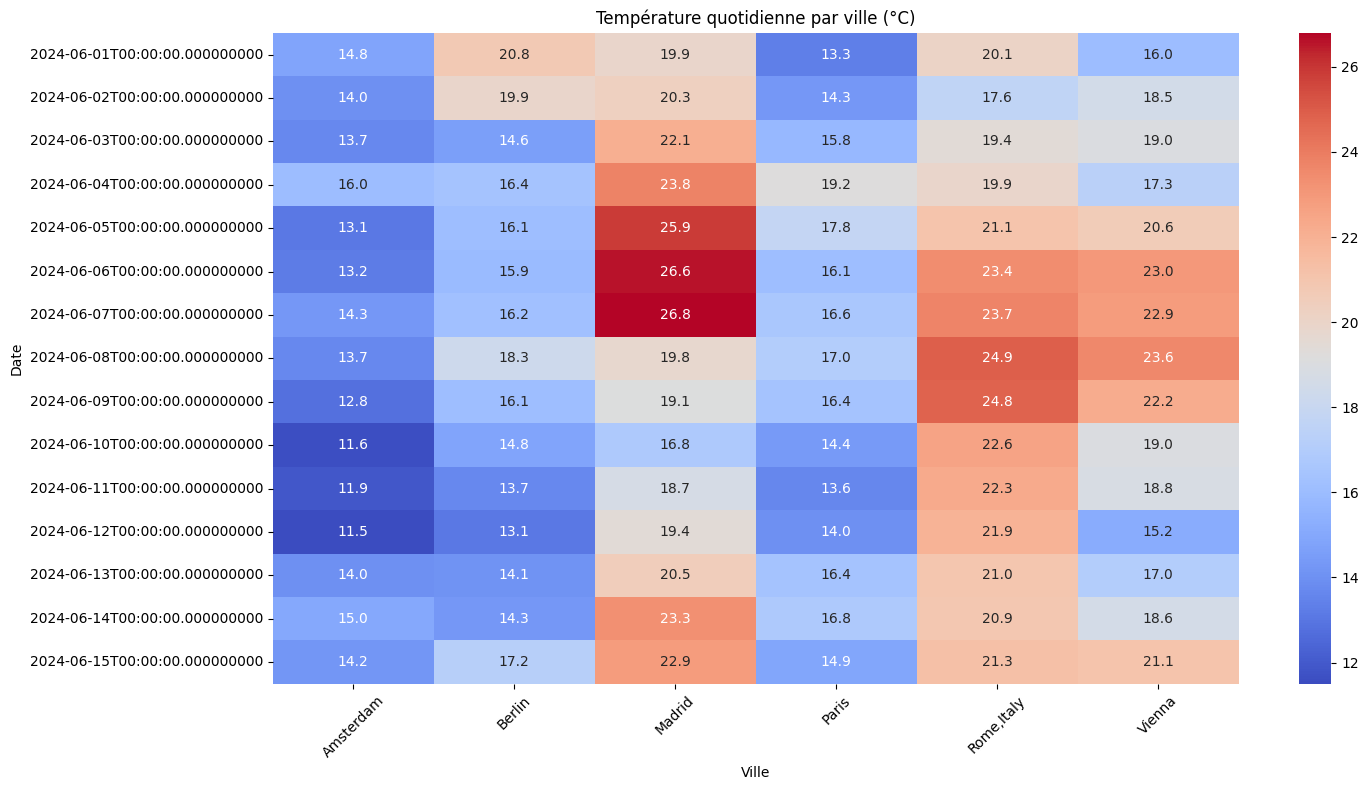

In [ ]:
# Pivot table pour la heatmap : villes en colonnes, dates en lignes
pivot_temp = df_meteo.pivot_table(index='datetime', columns='city', values='temp')

# 1) Heatmap avec seaborn :pour les températures par ville et jour
plt.figure(figsize=(15, 8)) 
sns.heatmap(pivot_temp, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Température quotidienne par ville (°C)")
plt.xlabel("Ville")
plt.ylabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_23680/3803628046.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_meteo, x='city', y='precip', palette='Set2')


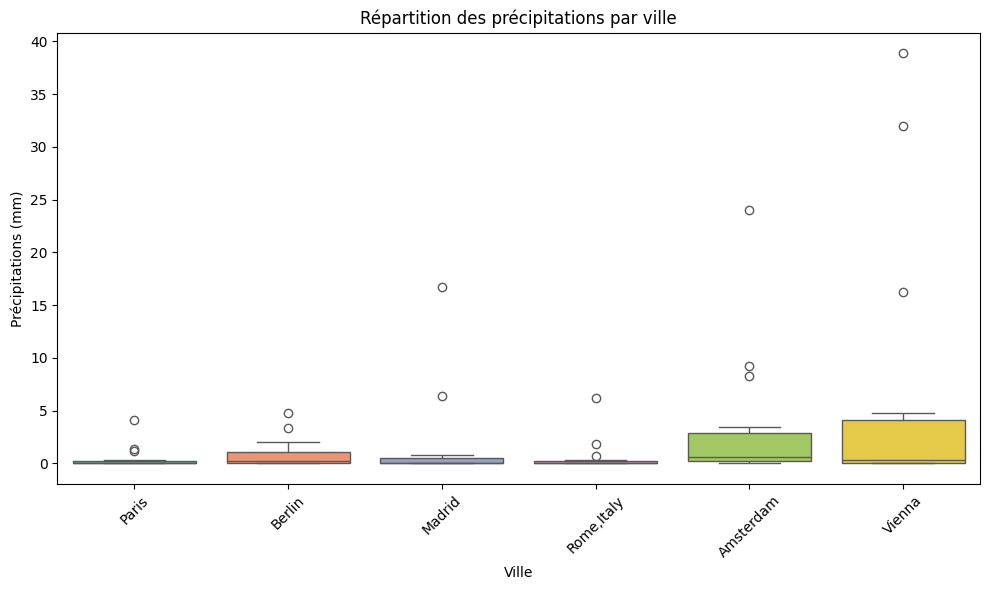

In [ ]:

# cree une graphique  Boxplot comparatif des précipitations
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_meteo, x='city', y='precip', palette='Set2')
plt.title("Répartition des précipitations par ville")
plt.xlabel("Ville")
plt.ylabel("Précipitations (mm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


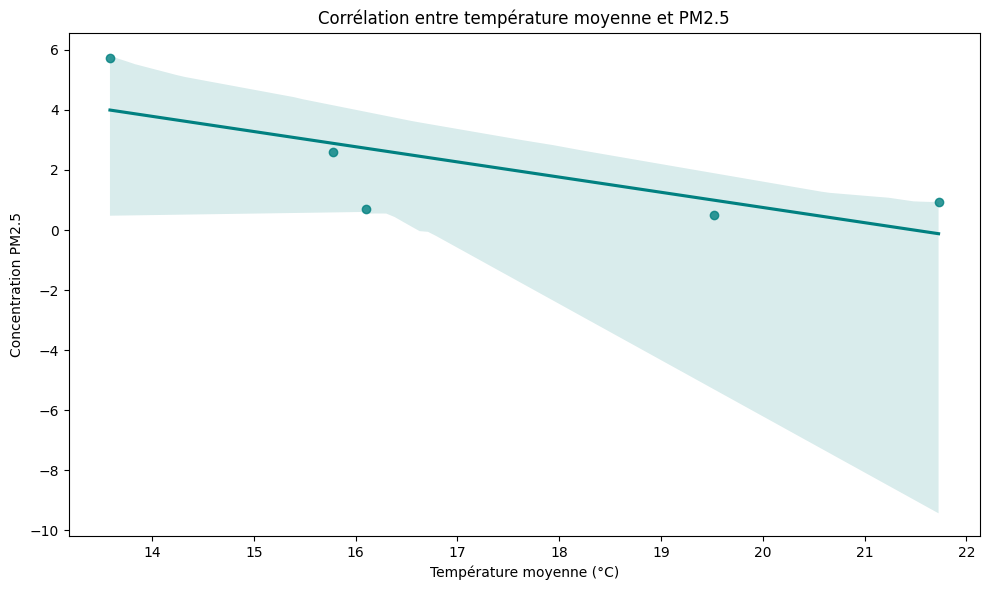

In [ ]:
# Fusion météo + qualité de l'air (on prend la moyenne des températures par ville)
df_mean_temp = df_meteo.groupby("city")["temp"].mean().reset_index()
df_merge = pd.merge(df_mean_temp, df_air_quality, on='city')

# cree un graph Scatter plot qualité air vs température
plt.figure(figsize=(10, 6))
sns.regplot(data=df_merge, x="temp", y="pm2_5", marker="o", color='teal')
plt.title("Corrélation entre température moyenne et PM2.5")
plt.xlabel("Température moyenne (°C)")
plt.ylabel("Concentration PM2.5")
plt.tight_layout()
plt.show()


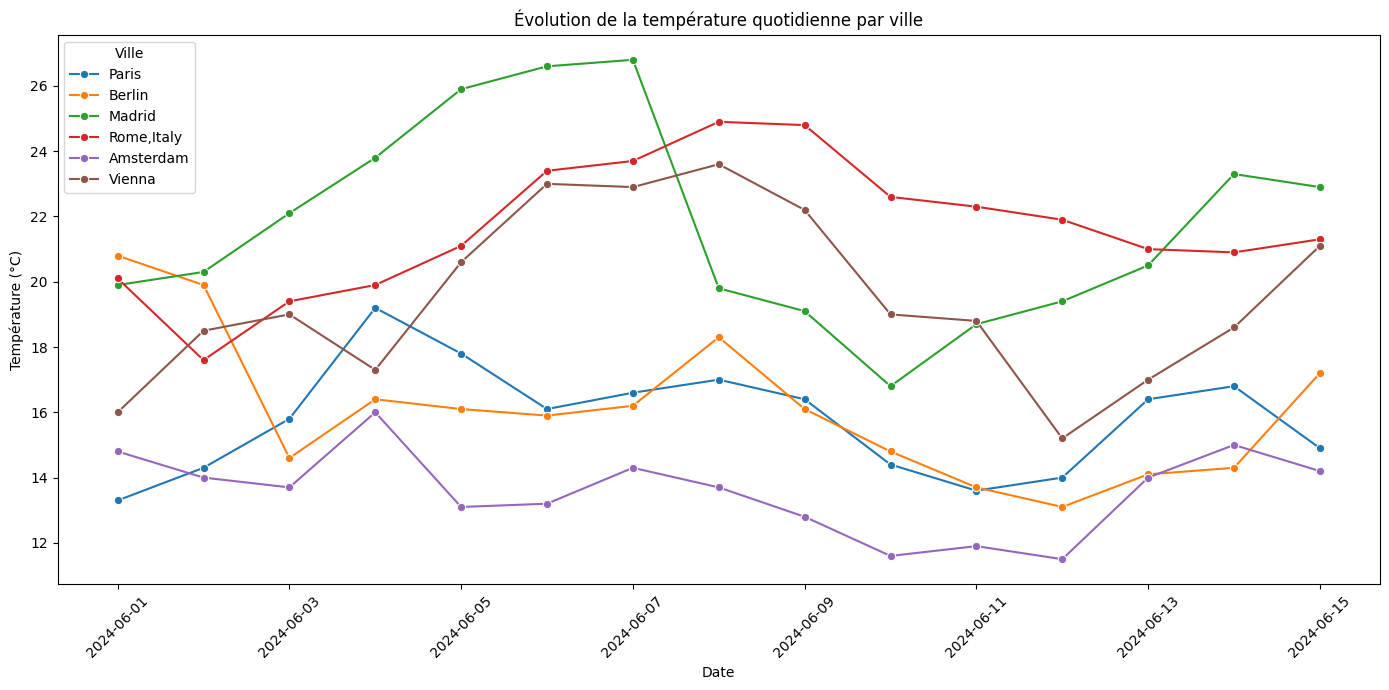

In [ ]:
#un graphique (line chart) pour comparer les villes 
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_meteo, x='datetime', y='temp', hue='city', marker='o', palette='tab10')
plt.title("Évolution de la température quotidienne par ville")
plt.xlabel("Date")
plt.ylabel("Température (°C)")
plt.xticks(rotation=45)
plt.legend(title="Ville")
plt.tight_layout()
plt.show()

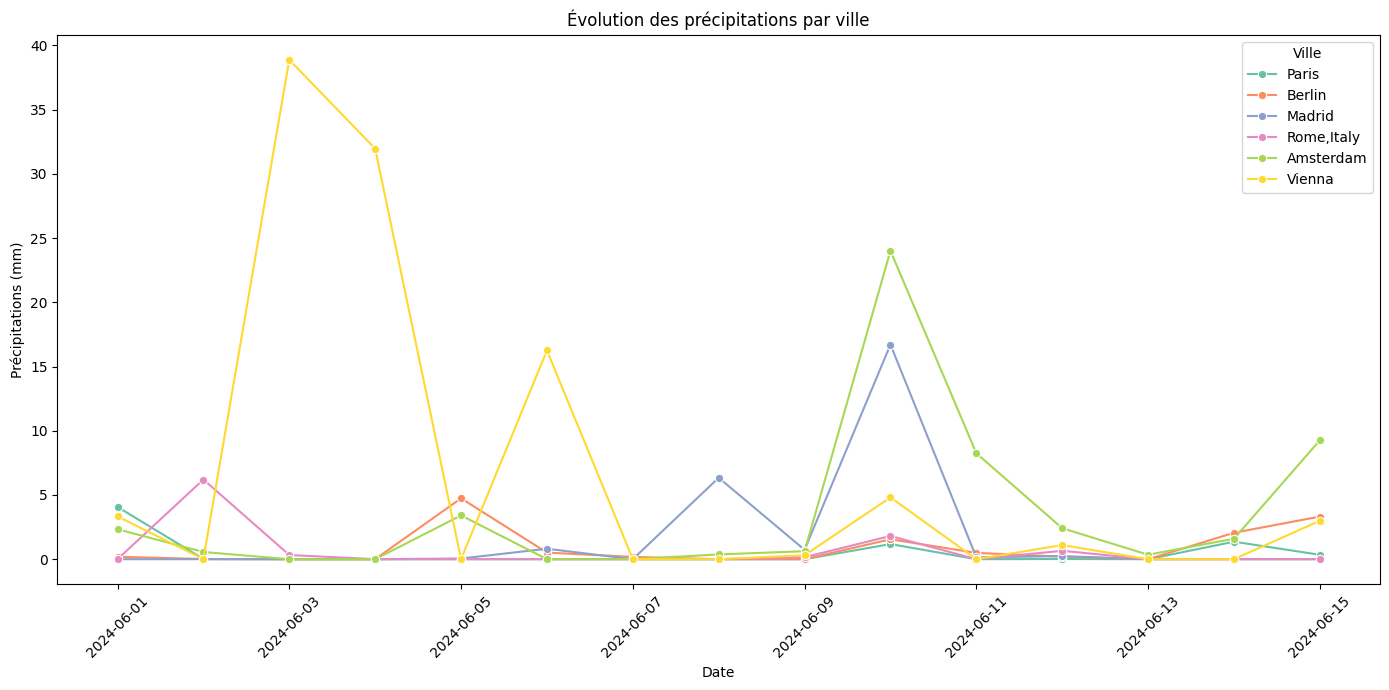

In [ ]:
#Line Chart des précipitations
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_meteo, x='datetime', y='precip', hue='city', marker='o', palette='Set2')
plt.title("Évolution des précipitations par ville")
plt.xlabel("Date")
plt.ylabel("Précipitations (mm)")
plt.xticks(rotation=45)
plt.legend(title="Ville")
plt.tight_layout()
plt.show()

## Partie 5 : API bonus - Données agricoles

### 🌱 API AgroMonitoring (gratuite)

In [ ]:
# API satellite pour l'agriculture
AGRO_API_KEY = "VOTRE_CLE_AGROMONITORING"

def get_soil_data(polygon_coordinates, api_key):
    """
    Récupère des données de sol via satellite
    URL : http://api.agromonitoring.com/agro/1.0/

    Données disponibles :
    - Indices de végétation (NDVI)
    - Humidité du sol
    - Température de surface
    """
    pass



**Défi avancé :** Créez des recommandations de plantation basées sur :
- Données météo des 30 derniers jours
- Prévisions à 5 jours
- Qualité de l'air
- Indices de végétation satellite



## 🏆 Livrables attendus

### 📊 Dashboard météo
Créez un tableau de bord contenant :
1. **Aperçu temps réel** des 6 villes
2. **Graphiques de tendances** sur 30 jours
3. **Alertes qualité de l'air** (AQI > 100)
4. **Recommandations agricoles** par ville

In [12]:
### 📱 Format de présentation

def generate_weather_report(city_data):
    """
    Génère un rapport automatisé

    Format :
    - Résumé exécutif (3 lignes)
    - Métriques clés (tableaux)
    - Graphiques (4 visualisations)
    - Recommandations (bullet points)
    """
    pass

---

## 🎓 Critères d'évaluation

- [ ] **APIs fonctionnelles** : Toutes les connexions API marchent
- [ ] **Gestion d'erreurs** : Code robuste avec try/except
- [ ] **Qualité des données** : Validation et nettoyage
- [ ] **Visualisations** : Graphiques informatifs et esthétiques
- [ ] **Insights business** : Recommandations basées sur les données

### 🔗 Préparation au Notebook 2
Le prochain notebook utilisera une vraie base de données PostgreSQL hébergée pour analyser des données de ventes e-commerce, en croisant avec vos données météo pour des analyses géolocalisées.

### 📚 APIs alternatives (si quotas dépassés)
- **WeatherAPI** : 1M appels/mois gratuits
- **AccuWeather** : 50 appels/jour gratuits  
- **Climatiq** : Données climat et carbone
- **NASA APIs** : Données satellite gratuites